# Foot Strike Type
## Introduction
Foot strike describes how the foot makes contact with the ground as a runner begins stance phase. There is much debate about the positives and negatives about forefoot striking and rearfoot striking. I have built a dataset (FSData.csv) which contains 4 variables:
1. AFI - Ankle flexion at impact
2. AFM - Mean ankle flexion over stance phase
3. Peak No - Number of peaks in ground reaction force data. Typically a transient peak correlates to heel striking. 
4. Foot Diff - The height difference (mm) between the toe and ankle markers.

Because we don't have enough forefoot and midfoot data, I have classified data as 1 (rearfoot striking) or 0 (forefoot striking). Improvements 


## Code
### Load in data

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
def printScores(model,X_train,X_test,y_train,y_test):
    print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(model.score(X_test, y_test)))
    
fsData = pd.read_csv('FSData.csv', header = None)
fsData.columns = ['AFI', 'AFM', 'Peak Num', 'Foot Diff', 'Strike Type']
fsData = fsData.sample(frac=1).reset_index(drop=True)
trainNo = np.floor(fsData.shape[0]*.75)
data_train = fsData.iloc[0:int(trainNo)+1,:]
data_test = fsData.iloc[int(trainNo)+1:,:]
X_train=data_train.iloc[:,0:4].values
y_train = data_train.iloc[:,4].values
X_test=data_test.iloc[:,0:4].values
y_test = data_test.iloc[:,4].values

### Analyze with Regression

In [25]:
logreg = LogisticRegression(C = 100 ).fit(X_train,y_train)
printScores(logreg,X_train, X_test, y_train, y_test)

Training set score: 0.860
Test set score: 0.863


### Analyze data with random forest

In [3]:
forest = RandomForestClassifier(n_estimators = 1000, max_features = 1)
forest.fit(X_train,y_train)
printScores(forest,X_train, X_test, y_train, y_test)

Training set score: 1.000
Test set score: 0.740


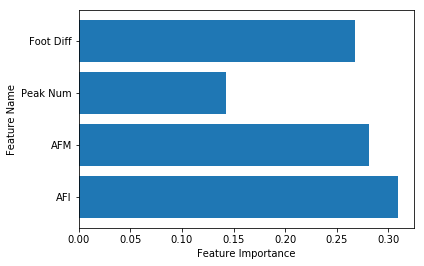

In [4]:
features = list(fsData.columns)[0:4]
n_features = len(features)
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),features )
plt.xlabel('Feature Importance')
plt.ylabel("Feature Name")
plt.show();

## Conclusions
So obviously it's not going to be making any big splashes yet. But it's still a good start and probably better than I am at predicting foot strike. I will update over time as I learn more techniques. There are also a few more variables I could add in. 